In [1]:
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
from IPython.display import display, Image

In [2]:
 # Setup splinter INSTEAD
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/100.0.4896.60/chromedriver_win32.zip
Driver has been 

In [3]:
redplanet_url = "https://redplanetscience.com/"
browser.visit(redplanet_url)

html = browser.html
chicken_noodle = bs(html)

#scrapes the news titles
news_title = chicken_noodle.find_all("div", {"class":"content_title"})[0].text

#scrapes the blurb under the news title
news_p = chicken_noodle.find_all("div", {"class":"article_teaser_body"})[0].text

news_p

'The system will be collecting and storing Martian rock and soil. Its installation marks another milestone in the march toward the July launch period.'

In [4]:
spaceimages_url = "https://spaceimages-mars.com/"
browser.visit(spaceimages_url)

html = browser.html
chicken_noodle = bs(html)

#scrapes the image URL
featured_image_url = spaceimages_url + chicken_noodle.find("img", {"class":"headerimage"})["src"]
featured_image_url

'https://spaceimages-mars.com/image/featured/mars3.jpg'

In [5]:
galaxyfacts_url = "https://galaxyfacts-mars.com/"
browser.visit(galaxyfacts_url)

html = browser.html
dfs = pd.read_html(html)

# finds facts table
df = dfs[1]
df.columns=["Statistic", "Value"]

# send to_html
df

,Statistic,Value
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 ( Phobos & Deimos )
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [6]:
marshemi_url = "https://marshemispheres.com/"
browser.visit(marshemi_url)

html = browser.html
split_pea = bs(html)

In [7]:
items = split_pea.find_all("div", {"class": "item"})
len(items)

4

In [8]:
hemisphere = []

for item in items:
    # parse page 1
    item_link = item.find("div", {"class", "description"}).find("a")
    item_url = marshemi_url + item_link["href"] #builds url
    item_title = item_link.text.strip().strip("Enhanced").strip() #strips out title
    
    # visit the found URL
    browser.visit(item_url)
    html2 = browser.html
    split_pea2 = bs(html2)
    hemi_url = marshemi_url + split_pea2.find("img", {"class": "wide-image"})["src"] #locates image URL
    
    #throws it all together
    data = {"title": item_title, "img_url": hemi_url}
    hemisphere.append(data)

In [9]:
hemisphere

[{'title': 'Cerberus Hemisphere',
  'img_url': 'https://marshemispheres.com/images/f5e372a36edfa389625da6d0cc25d905_cerberus_enhanced.tif_full.jpg'},
 {'title': 'Schiaparelli Hemisphere',
  'img_url': 'https://marshemispheres.com/images/3778f7b43bbbc89d6e3cfabb3613ba93_schiaparelli_enhanced.tif_full.jpg'},
 {'title': 'Syrtis Major Hemisphere',
  'img_url': 'https://marshemispheres.com/images/555e6403a6ddd7ba16ddb0e471cadcf7_syrtis_major_enhanced.tif_full.jpg'},
 {'title': 'Valles Marineris Hemisphere',
  'img_url': 'https://marshemispheres.com/images/b3c7c6c9138f57b4756be9b9c43e3a48_valles_marineris_enhanced.tif_full.jpg'}]

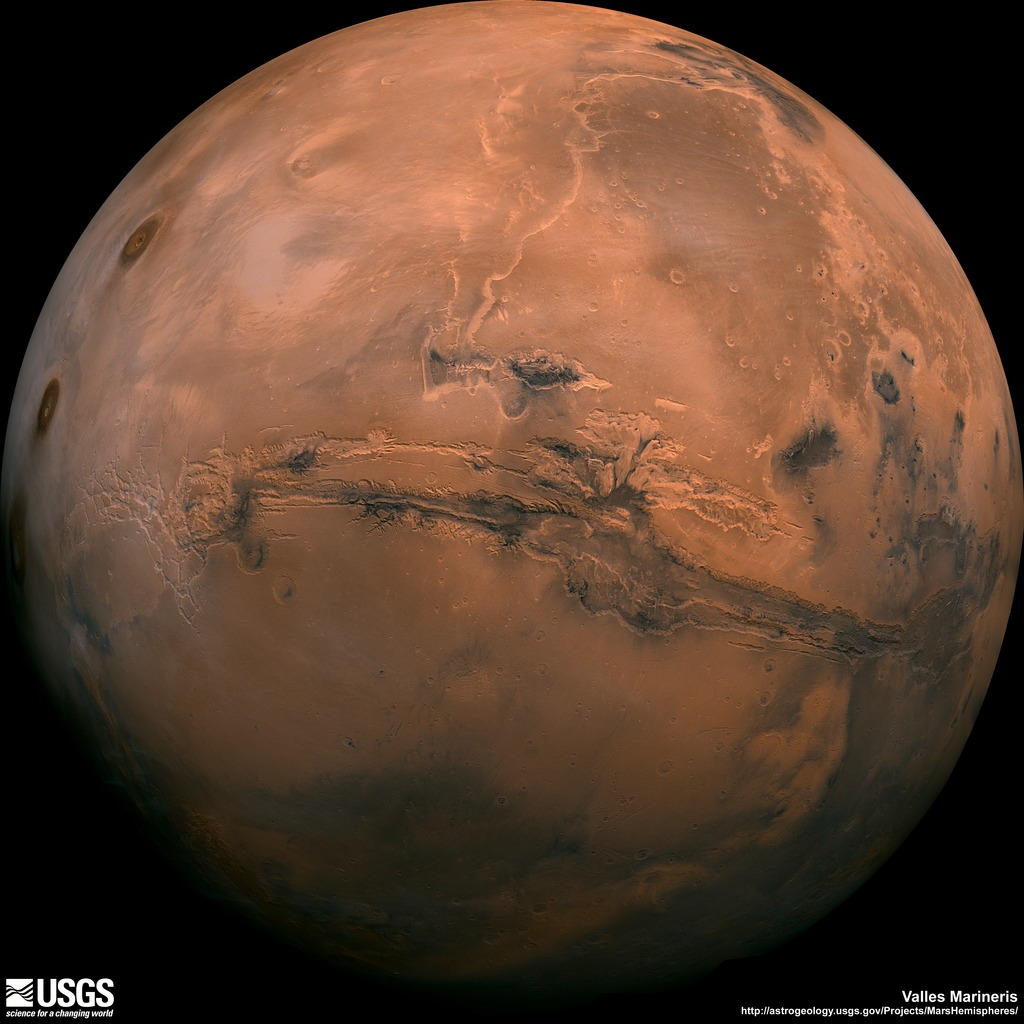

In [10]:
display(Image(hemisphere[3]["img_url"]))

In [11]:
data_scraped = {}
data_scraped["news_p"] = news_p
data_scraped["news_title"] = news_title
data_scraped["featured_image_url"] = featured_image_url
data_scraped["mars_facts"] = df.to_html() #takes df from galaxyfacts and converts to html
data_scraped["hemispheres"] = hemisphere

In [12]:
data_scraped

{'news_p': 'The system will be collecting and storing Martian rock and soil. Its installation marks another milestone in the march toward the July launch period.',
 'news_title': "NASA's Mars Perseverance Rover Gets Its Sample Handling System",
 'featured_image_url': 'https://spaceimages-mars.com/image/featured/mars3.jpg',
 'mars_facts': '<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Statistic</th>\n      <th>Value</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Polar Diameter:</td>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mass:</td>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Moons:</td>\n      <td>2 ( Phobos &amp; Deimos )</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Orbit Distance:</td>\n      